<a href="https://colab.research.google.com/github/ShyrleyFlor/ANALISIS_IMAGENES/blob/main/PDI_fresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALUMNOS:**


*   Shyrley Natalia Flor Benitez
*   Blas Gabriel Santacruz Ramirez
*   Fabiola Soledad Fernandez
*   Sara Gutierrez





# **Importamos las librerias**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from cv2 import imread

# **Funcion mostrar imagen y dimensiones**

In [ ]:
def mostrar_imagen_y_dimensiones(imagen):
    """Muestra la imagen junto con sus dimensiones."""
    print('Dimensiones de la imagen:', imagen.shape)
    cv2_imshow(imagen)



# **Funcion descomposición en canales RGB**


In [ ]:
def descomponer_canales(imagen_rgb):
    """Descompone la imagen en sus canales RGB y muestra cada uno por separado."""
    canal_rojo, canal_verde, canal_azul = cv2.split(imagen_rgb)

    # Mostrar los canales por separado
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title('Canal Rojo')
    plt.imshow(canal_rojo, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Canal Verde')
    plt.imshow(canal_verde, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Canal Azul')
    plt.imshow(canal_azul, cmap='gray')

    plt.show()

# **La funcion segmentar imagen**


*   Convierte la imagen en escala de grises
*   Aplica umbralización para obtener una imagen binaria
*   Filtra filas con pocos píxeles verdaderos
*   Detecta bordes
*   Encuentra los contornos en la imagen binaria
*   Obtiene los límites del contorno








In [ ]:
def segmentar_fresa(imagen_rgb):
    """Segmenta la fresa en la imagen y devuelve una máscara binaria y los límites de la fresa."""
    # Descomponer la imagen en canales RGB
    descomponer_canales(imagen_rgb)

    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

    # Aplicar umbralización para obtener una imagen binaria
    _, imagen_binaria = cv2.threshold(imagen_gris, 200, 255, cv2.THRESH_BINARY_INV)

    # Mostrar la imagen binaria
    cv2_imshow(imagen_binaria)

    # Definir la máscara binaria
    Q = imagen_binaria > 0

    # Filtrar filas con pocos píxeles verdaderos
    (N, M) = Q.shape
    for i in range(N):
        s = np.sum(Q[i, :])
        if s < 20:
            Q[i, :] = 0

    # Mostrar la imagen binaria filtrada
    cv2_imshow(Q * 255)

    # Detección de bordes
    E = np.zeros((N, M), np.uint8)
    for i in range(N):
        for j in range(1, M):
            if Q[i, j] != Q[i, j-1]:
                E[i, j] = 1
                E[i, j-1] = 1

    for i in range(1, N):
        for j in range(M):
            if Q[i-1, j] != Q[i, j]:
                E[i, j] = 1
                E[i-1, j] = 1

    # Mostrar los bordes detectados
    cv2_imshow(E * 255)

    # Crear la imagen con bordes en negro
    Icv = imagen_rgb.copy()
    for i in range(N):
        for j in range(M):
            if E[i, j] == 1:
                Icv[i, j, :] = [0, 255, 0]  # Color negro

    # Mostrar la imagen con los bordes superpuestos
    cv2_imshow(Icv)

    # Encontrar los contornos en la imagen binaria
    contornos, _ = cv2.findContours(Q.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar el contorno más grande
    if len(contornos) == 0:
        print("No se encontraron contornos.")
        return None, None

    contorno_mayor = max(contornos, key=cv2.contourArea)

    # Obtener los límites del contorno
    x, y, w, h = cv2.boundingRect(contorno_mayor)

    return Q, (x, y, x + w, y + h)


In [ ]:
# Descargar la imagen desde Google Drive
file_id = '1HtFNH1PFCLCS3UJXMrOjogV7XGvSA45U'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'fresas.jpg', quiet=False)
imagen = imread('fresas.jpg')


Downloading...
From: https://drive.google.com/uc?export=download&id=1HtFNH1PFCLCS3UJXMrOjogV7XGvSA45U
To: /content/fresas.jpg
100%|██████████| 12.7k/12.7k [00:00<00:00, 24.8MB/s]


Dimensiones de la imagen: (224, 225, 3)


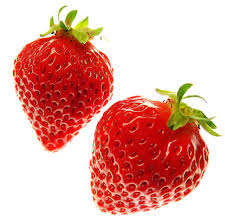

In [ ]:
# Mostrar la imagen y sus dimensiones
mostrar_imagen_y_dimensiones(imagen)

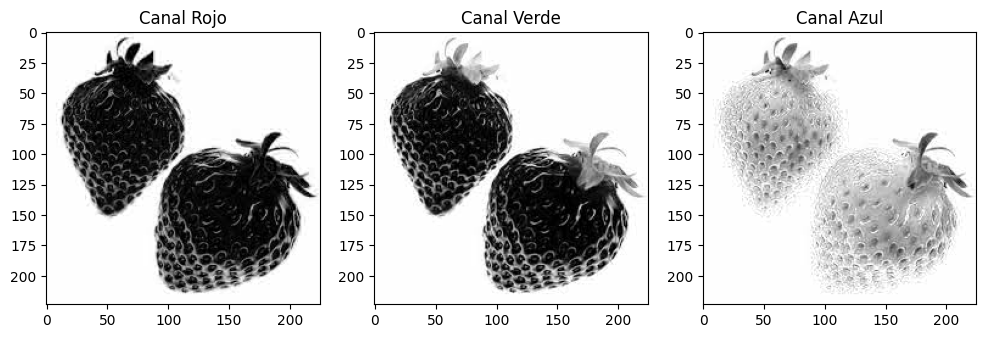

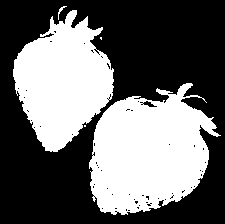

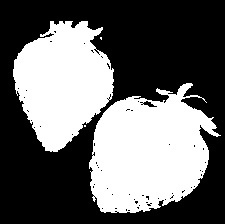

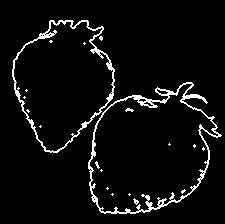

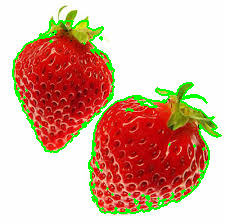

In [ ]:
# Realizar la segmentación de la fresa
imagen_segmentada, limites_fresa = segmentar_fresa(imagen)



---
---
### Esta parte fue solo practicar y jugar un poco



In [ ]:
import numpy as np
from cv2 import imread, cvtColor, COLOR_BGR2RGB, threshold, THRESH_BINARY, Canny
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import gdown

# Descargar la imagen desde Google Drive
file_id = '1HtFNH1PFCLCS3UJXMrOjogV7XGvSA45U'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'fresas.jpg', quiet=False)



Downloading...
From: https://drive.google.com/uc?export=download&id=1HtFNH1PFCLCS3UJXMrOjogV7XGvSA45U
To: /content/fresas.jpg
100%|██████████| 12.7k/12.7k [00:00<00:00, 22.5MB/s]


'fresas.jpg'

In [ ]:
def howis(img):
    print('size = ', img.shape)
    print('max  = ', np.max(img))
    print('min  = ', np.min(img))

def mostrar_imagen_y_dimensiones(img, title="Imagen"):
    cv2_imshow(img)
    print(title)
    howis(img)


In [ ]:
def descomponer_canales_rgb(img):
    # Convertir de BGR a RGB
    img_rgb = img[:, :, [2, 1, 0]]
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]
    return R, G, B, img_rgb

def segmentar_fresa(img, thresholds):
    R, G, B, img_rgb = descomponer_canales_rgb(img)

    # Umbrales para segmentar una fresa
    Sr = R > thresholds['R']
    Sg = G < thresholds['G']
    Sb = B < thresholds['B']

    Srg = np.logical_and(Sr, Sg)
    S = np.logical_and(Srg, Sb)

    # Filtrado de filas con menos de 20 píxeles segmentados
    (N, M) = S.shape
    Q = S.copy()
    for i in range(N):
        s = np.sum(S[i, :])
        if s < 20:
            Q[i, :] = 0

    return Q

def detectar_bordes(Q):
    # Detección de bordes utilizando el algoritmo de Canny
    E = Canny(Q.astype(np.uint8) * 255, 100, 200)
    return E

def encontrar_contornos_segmentados(Q):
    # Encontrar contornos de las regiones segmentadas
    contornos, _ = findContours(Q.astype(np.uint8), RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
    return contornos


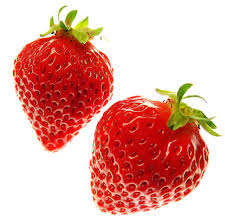

Imagen de Fresas
size =  (224, 225, 3)
max  =  255
min  =  0


In [ ]:
# Lectura de la imagen
fresas_img = imread('fresas.jpg')

# Mostrar la imagen y sus dimensiones
mostrar_imagen_y_dimensiones(fresas_img, title="Imagen de Fresas")


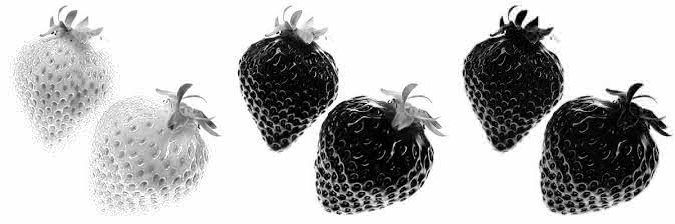

In [ ]:
# Descomponer en canales RGB
R, G, B, img_rgb = descomponer_canales_rgb(fresas_img)
RGB = np.concatenate((R, G, B), axis=1)
cv2_imshow(RGB)

# Ajustar umbrales de segmentación
thresholds = {
    'R': 190,  # Umbral para el canal rojo
    'G': 150,   # Umbral para el canal verde
    'B': 100    # Umbral para el canal azul
}


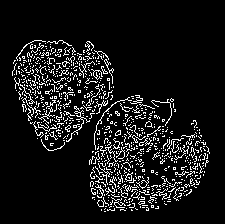

In [ ]:
# Segmentar la fresa
Q = segmentar_fresa(fresas_img, thresholds)

# Detectar bordes en las fresas segmentadas
bordes = detectar_bordes(Q)
cv2_imshow(bordes)

# Encontrar contornos de cada fresa segmentada
contornos = encontrar_contornos_segmentados(Q)


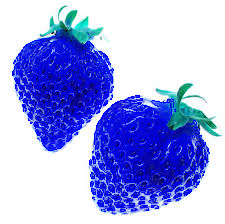

In [ ]:
# Superposición de bordes en la imagen original
img_borders = img_rgb.copy()
img_borders[bordes > 0] = [255, 0, 0]

cv2_imshow(img_borders)

Límites de la fresa segmentada: imin: 40, imax: 206, jmin: 13, jmax: 207


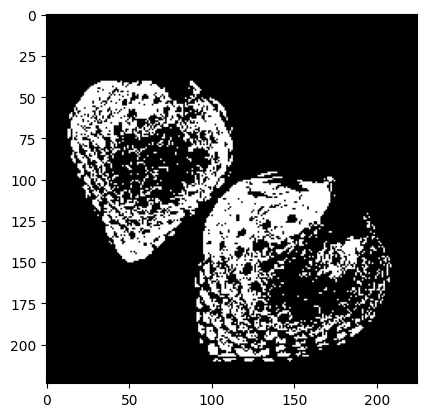

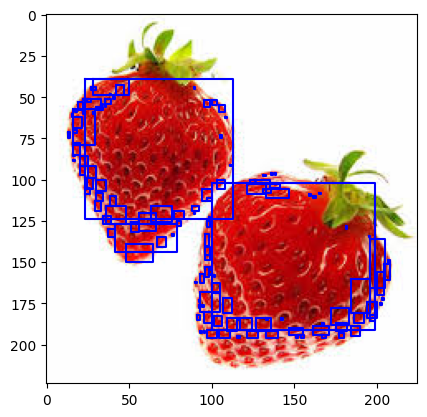

In [ ]:
print(f"Límites de la fresa segmentada: imin: {limites[0]}, imax: {limites[1]}, jmin: {limites[2]}, jmax: {limites[3]}")

# Visualizar la fresa segmentada
plt.imshow(Q, cmap='gray')
plt.show()

# Visualizar las regiones segmentadas
plt.imshow(img_rgb)
for lim in límites:
    y = [lim[0], lim[0], lim[1], lim[1], lim[0]]
    x = [lim[2], lim[3], lim[3], lim[2], lim[2]]
    plt.plot(x, y, 'b-')
plt.show()
